In [1]:
import warnings
warnings.simplefilter("ignore")

#  <font color='#F5BCA9 '> Práctica 1. Audio    </font>
### Detección de boots en encuestas de opinión 

#####  <font color='#F5BCA9 '> Realizado por: Ixchel Dafne Avendaño Pacheco  </font>

##### Matricula: 23265456

<img src= "https://www.shutterstock.com/shutterstock/photos/1627926547/display_1500/stock-vector-sound-waves-equalizer-frequency-audio-waveform-music-wave-voice-graph-signal-in-futuristic-style-1627926547.jpg">

Importamos las librerias necesarias 

In [2]:
import scipy.io
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import librosa

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [5]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#  <font color='#F5BCA9 '> Análisis Exploratorio   </font>

Iniciamos con un análisis exploratorio de los datos. 

In [6]:
DATA = "./AUDIO/"

####  <font color='#F5BCA9 '> Voz humana  </font>

A continuación, trabajamos con un audio correspondiente a una persona real del genero masculino

In [7]:
fs, datos_audio1 = scipy.io.wavfile.read("./AUDIO/DAFNE/DAFNE-REAL-HOMBRE_03.wav")

Observamos el comportamiento de esta señal tanto en el dominio del tiempo como en el dominio de la frecuencia. 
Iniciamos en el dominio del tiempo

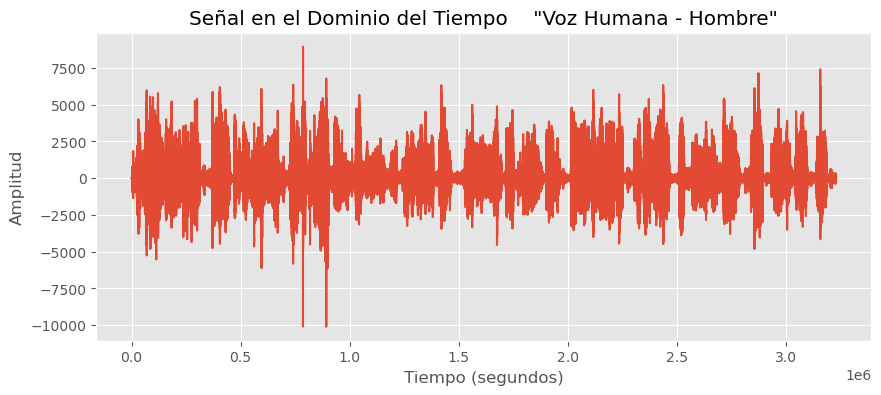

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(datos_audio1)
plt.title('Señal en el Dominio del Tiempo    "Voz Humana - Hombre"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Ahora observamos su comportmiento en el dominio de la frecuencia 


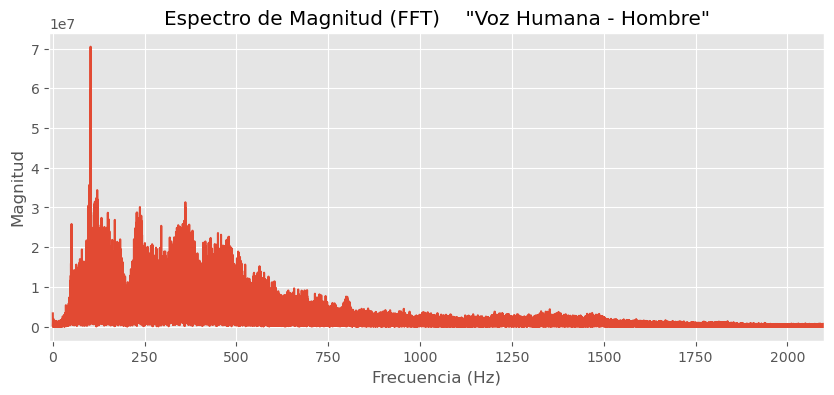

In [9]:
fft_result1 = np.fft.fft(datos_audio1)

# Calcular las frecuencias correspondientes
frequencies1 = np.fft.fftfreq(len(fft_result1), d=1/fs)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies1 = frequencies1[:len(frequencies1)//2]
magnitude_spectrum1 = np.abs(fft_result1[:len(fft_result1)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies1, magnitude_spectrum1)
plt.title('Espectro de Magnitud (FFT)    "Voz Humana - Hombre"')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

A continuación, trabajamos con un audio correspondiente a una persona real del genero femenino

In [10]:
fs, datos_audio2 = scipy.io.wavfile.read("./AUDIO/DAFNE/DAFNE-REAL-MUJER_05.wav")

Observamos el comportamiento de esta señal tanto en el dominio del tiempo como en el dominio de la frecuencia. 
Iniciamos en el dominio del tiempo

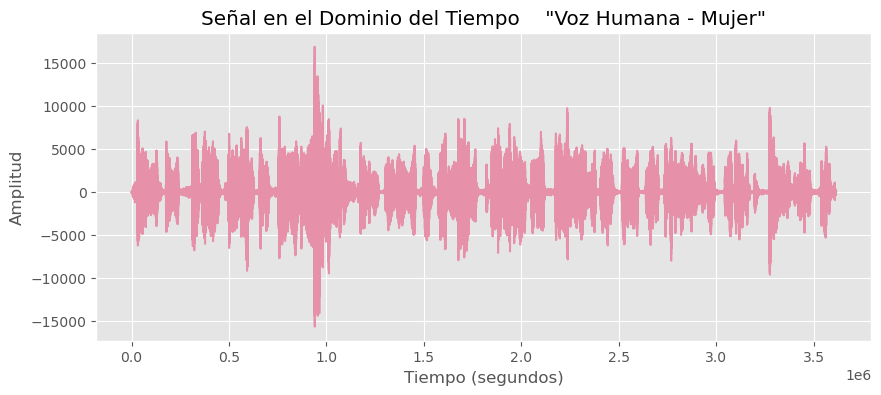

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(datos_audio2, color='#E690A9')
plt.title('Señal en el Dominio del Tiempo    "Voz Humana - Mujer"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Ahora observamos su comportmiento en el dominio de la frecuencia 


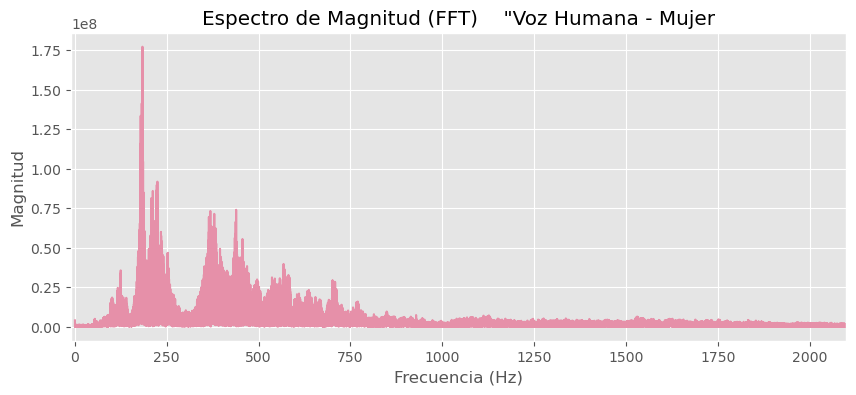

In [12]:
fft_result2 = np.fft.fft(datos_audio2)

# Calcular las frecuencias correspondientes
frequencies2 = np.fft.fftfreq(len(fft_result2), d=1/fs)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies2 = frequencies2[:len(frequencies2)//2]
magnitude_spectrum2 = np.abs(fft_result2[:len(fft_result2)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies2, magnitude_spectrum2, color='#E690A9' )
plt.title('Espectro de Magnitud (FFT)    "Voz Humana - Mujer')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

###  <font color='#F5BCA9 '> Espectro en frecuencia  Voz Artificial Hombre vs Mujer </font>

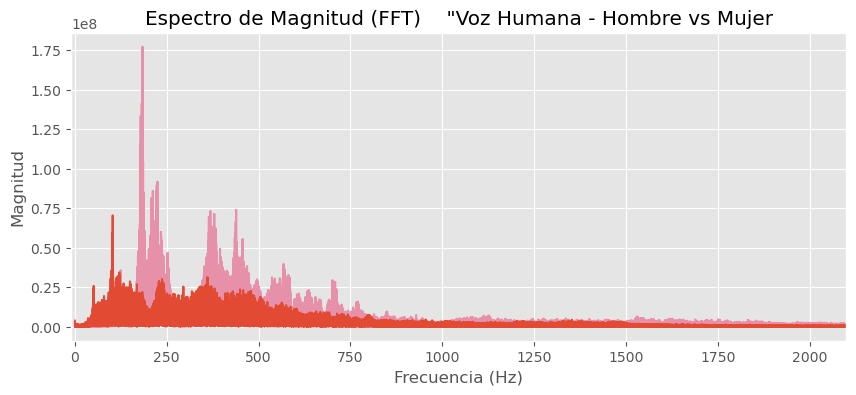

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies2, magnitude_spectrum2, color='#E690A9' )
plt.plot(positive_frequencies1, magnitude_spectrum1)
plt.title('Espectro de Magnitud (FFT)    "Voz Humana - Hombre vs Mujer')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

Al observar el espectro en frecuencias de las dos señales, podemos observar que ambas señales son claramente separables, pues los componentes principales en cada señal es distinta; tanto de magnitud como en frecuencia. 

Observamos además que, la señal correspondiente a voz de mujer posee amplitudes significativamente mayores que las presentadas en la señal voz de hombre.
También observamos que la mayor concentración de frecuencias en la señal voz de hombre esta en  las bajas frecuencias, mientras que la señal voz de mujer empieza su concentración mayor aproximadamente en la frecuencia 150 Hz

Otro aspecto a destacar es que el promedio de las amplitudes de las frecuencias contenidas en la señal voz de mujer, es evidentemenete mucho mayor que en la señal voz de hombre

####  <font color='#F5BCA9 '> Voz Artificial </font>

A continuación, trabajamos con un audio correspondiente a una señal de audio artificial del genero masculino

In [14]:
fs, datos_audio3 = scipy.io.wavfile.read("./AUDIO/DAFNE/DAFNE-ARTIFICIAL-HOMBRE_19.wav")

Observamos el comportamiento de esta señal tanto en el dominio del tiempo como en el dominio de la frecuencia. 
Iniciamos en el dominio del tiempo

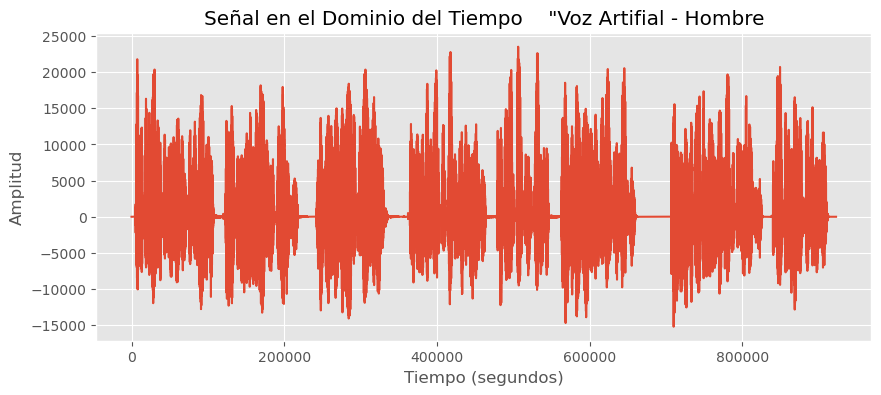

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(datos_audio3)
plt.title('Señal en el Dominio del Tiempo    "Voz Artifial - Hombre')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Ahora observamos su comportmiento en el dominio de la frecuencia 


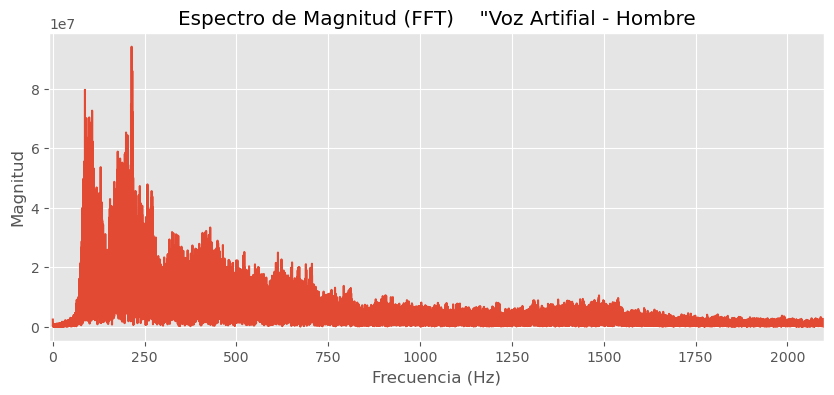

In [16]:
fft_result3 = np.fft.fft(datos_audio3)

# Calcular las frecuencias correspondientes
frequencies3 = np.fft.fftfreq(len(fft_result3), d=1/fs)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies3 = frequencies3[:len(frequencies3)//2]
magnitude_spectrum3 = np.abs(fft_result3[:len(fft_result3)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies3, magnitude_spectrum3)
plt.title('Espectro de Magnitud (FFT)    "Voz Artifial - Hombre')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

A continuación, trabajamos con un audio correspondiente a una persona real del genero femenino

In [17]:
fs, datos_audio4 = scipy.io.wavfile.read("./AUDIO/DAFNE/DAFNE-ARTIFICIAL-MUJER_15.wav")

Observamos el comportamiento de esta señal tanto en el dominio del tiempo como en el dominio de la frecuencia. 
Iniciamos en el dominio del tiempo

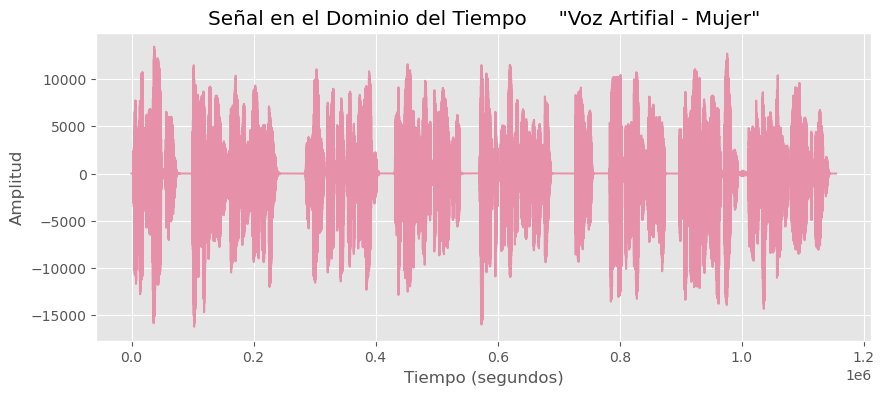

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(datos_audio4, color='#E690A9')
plt.title('Señal en el Dominio del Tiempo     "Voz Artifial - Mujer"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Ahora observamos su comportmiento en el dominio de la frecuencia 


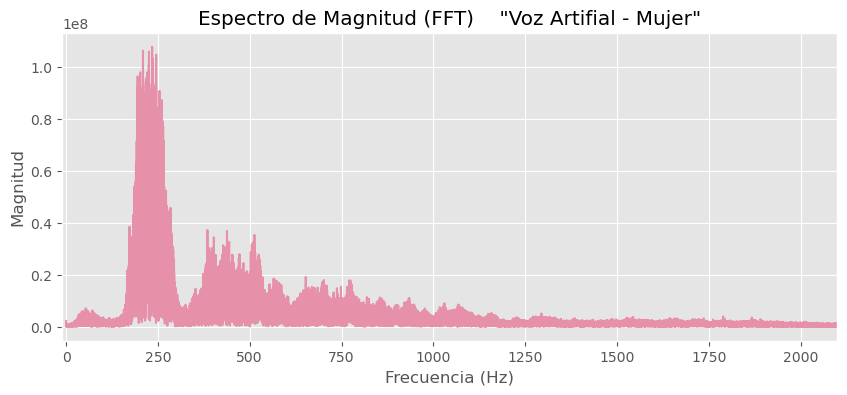

In [19]:
fft_result4 = np.fft.fft(datos_audio4)

# Calcular las frecuencias correspondientes
frequencies4 = np.fft.fftfreq(len(fft_result4), d=1/fs)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies4 = frequencies4[:len(frequencies4)//2]
magnitude_spectrum4 = np.abs(fft_result4[:len(fft_result4)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies4, magnitude_spectrum4, color='#E690A9' )
plt.title('Espectro de Magnitud (FFT)    "Voz Artifial - Mujer"')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

###  <font color='#F5BCA9 '> Espectro en frecuencia  Voz Artificial Hombre vs Mujer </font>

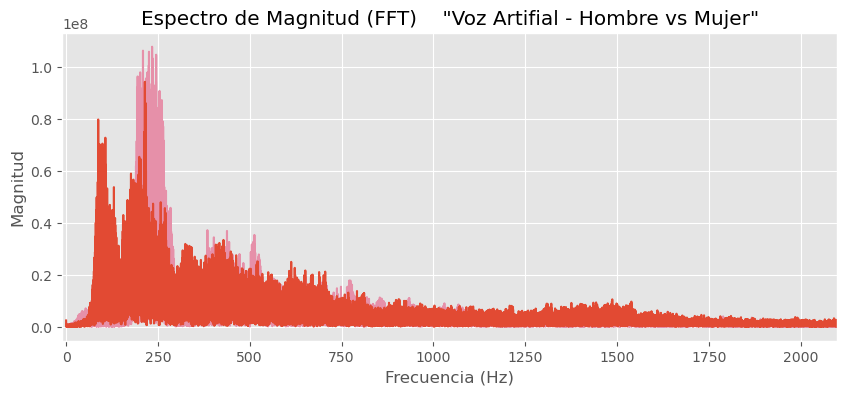

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies4, magnitude_spectrum4, color='#E690A9' , label='Mujer Artificial')
plt.plot(positive_frequencies3, magnitude_spectrum3 , label='Hombre Artificial')
plt.title('Espectro de Magnitud (FFT)    "Voz Artifial - Hombre vs Mujer"')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

Al observar el espectro en frecuencias de las dos señales, podemos observar que ambas señales son claramente separables, pues los componentes principales en cada señal es distinta; tanto de magnitud como en frecuencia. 

Observamos además que, la señal correspondiente a voz de mujer posee amplitudes significativamente mayores que las presentadas en la señal voz de hombre.
También observamos que la mayor concentración de frecuencias en la señal voz de hombre esta en  las bajas frecuencias, mientras que la señal voz de mujer empieza su concentración mayor aproximadamente en la frecuencia 250 Hz

Otro aspecto a destacar es que el promedio de las amplitudes de las frecuencias contenidas en la señal voz de mujer, es evidentemenete mucho mayor que en la señal voz de hombre

###  <font color='#F5BCA9 '> Espectro en frecuencia  Voz Real Mujer vs Voz Artificial  Mujer </font>

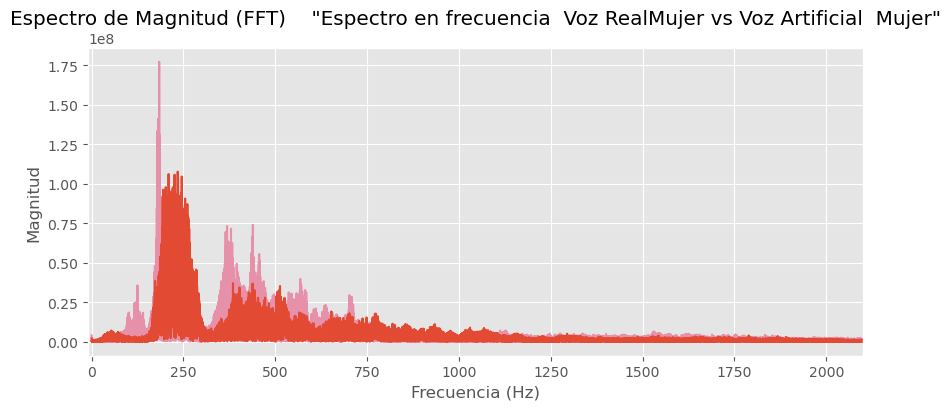

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies2, magnitude_spectrum2, color='#E690A9', label='Mujer Real' )
plt.plot(positive_frequencies4, magnitude_spectrum4 , label='Mujer Artificial')
plt.title('Espectro de Magnitud (FFT)    "Espectro en frecuencia  Voz RealMujer vs Voz Artificial  Mujer"')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

Al comparar los dos espectros, se puede ver cómo se diferencian en términos de magnitud en varias frecuencias. Esto podría usarse para analizar cómo se asemeja una voz artificial a una voz humana real. Los picos representan las frecuencias donde hay una mayor concentración de energía. En la voz humana, el pico más prominente es a menudo la frecuencia fundamental (la nota más baja que se está  hablando), y los picos más pequeños son los armónicos o sobretonos.
Dado el espectro presentado, parece haber una posibilidad de separar las señales en las frecuencias donde no se solapan. Sin embargo, para las frecuencias donde hay superposición, se requerirían técnicas e información adicional, como la fase de las señales o datos temporales, para lograr una separación efectiva.

###  <font color='#F5BCA9 '> Espectro en frecuencia  Voz Real Hombre vs Voz Artificial  Hombre </font>

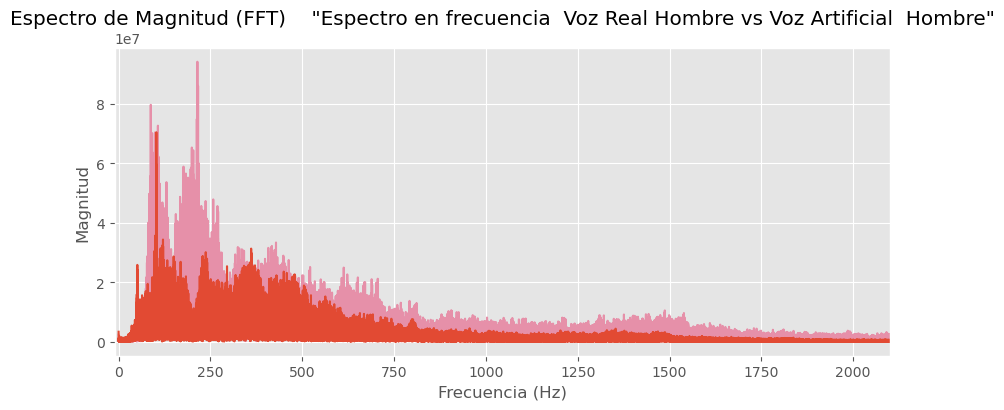

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies3, magnitude_spectrum3, color='#E690A9' , label='Hombre Artificial')
plt.plot(positive_frequencies1, magnitude_spectrum1 , label='Hombre Real')
plt.title('Espectro de Magnitud (FFT)    "Espectro en frecuencia  Voz Real Hombre vs Voz Artificial  Hombre"')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,2100 ) 
plt.grid(True)
plt.show()

Al comparar los dos espectros, se puede ver cómo se diferencian en términos de magnitud en varias frecuencias. Esto podría usarse para analizar cómo se asemeja una voz artificial a una voz humana real. Los picos representan las frecuencias donde hay una mayor concentración de energía. En la voz humana, el pico más prominente es a menudo la frecuencia fundamental (la nota más baja que se está  hablando), y los picos más pequeños son los armónicos o sobretonos.
Dado el espectro presentado, parece haber una posibilidad de separar las señales en las frecuencias donde no se solapan. Sin embargo, para las frecuencias donde hay superposición, se requerirían técnicas e información adicional, como la fase de las señales o datos temporales, para lograr una separación efectiva.

#  <font color='#F5BCA9 '> Data Frame  </font>


A continucación, se procede a crear el Data Frame

Iniciamos creando la lista de archivos así como la ruta espeficificada por la ruta DATA. Además se ordenará alfabeticamente la lista del directorio

In [23]:
dirl_list = os.listdir(DATA)   
dirl_list.sort()

A continuación, se están creando listas vacías llamadas: real_artificial, genero, path. Estas listas son una colección de elementos ordenados

In [24]:
real_artificial = []
genero = []
path = []

En el siguiente código se recorren los directorios dentro del directorio principal DATA. Después procesa los archivos de audio dentro de cada directorio válido. Posterior a ello extrae información del nombre de cada archivo: Si es real o artificial
Construye la ruta completa de cada archivo. Y almacena la información extraída en las listas real_artificial, genero y path para su posterior uso.

In [25]:
for i in dirl_list:           
    if not i.startswith('.'):   
        fname = os.listdir(DATA + i)    
        for f in fname:                 
            part = f.split('-')                    #Spplit se utiliza para separa
            real_artificial.append(part[1])        #Append se utiliza para agregar
            temp = part[2] 
            tempaux = temp.split('_')    
            genero.append(tempaux[0])    
            path.append(DATA+ i + '/' + f)  

Crea un DataFrame inicial

Se crea un DataFrame llamado DATA_df usando la lista real_artificial que contiene los valores "1" o "2" que indican si el audio es real o artificial

In [26]:
DATA_df = pd.DataFrame(real_artificial)

Reemplaza valores numéricos por etiquetas:

Se reemplazan los valores "1" por "real" y los valores "2" por "artificial" en el DataFrame, creando una columna más descriptiva.

In [27]:
DATA_df = DATA_df.replace({1:'real', 2:'artificial'}) 

Añadir información de género:

Se Concatena un nuevo DataFrame creado a partir de la lista genero ( al DataFrame DATA_df por las columnas, añadiendo la información de género.Además se asigna los nombres de columna "genero" y "real_artificial" a las columnas del DataFrame.

In [28]:
DATA_df = pd.concat([pd.DataFrame(genero),DATA_df],axis=1)
DATA_df.columns = ['genero','real_artificial']

Crear una columna de etiquetas combinadas:

Se crea una nueva columna llamada "labels" que combina el género y la etiqueta de real/artificial 


In [29]:
DATA_df['clase'] = DATA_df.genero + '_' + DATA_df.real_artificial

Añadir la fuente de los datos:

Añade una columna llamada "source" con el valor "FUENTE" para indicar la procedencia de los datos de audio.

In [30]:
DATA_df['source'] = 'FUENTE'

Añadir las rutas de los archivos:

Se concatena un nuevo DataFrame creado a partir de la lista path (que contiene las rutas de los archivos de audio) al DataFrame DATA_df, añadiendo la información de las rutas.

In [31]:
DATA_df = pd.concat([DATA_df, pd.DataFrame(path, columns=['path'])], axis=1)

Eliminar columnas innecesarias:

Elimina las columnas "genero" y "real_artificial" del DataFrame, ya que la información se encuentra ahora resumida en la columna "labels".

In [32]:
DATA_df = DATA_df.drop(['genero', 'real_artificial'], axis=1)

Contar las frecuencias de las etiquetas:

Cuenta la cantidad de veces que aparece cada etiqueta en la columna "labels", mostrando la distribución de los datos por género y tipo de audio.

In [33]:
DATA_df.clase.value_counts()

MUJER_REAL           59
HOMBRE_ARTIFICIAL    49
MUJER_ARTIFICIAL     48
HOMBRE_REAL          45
Name: clase, dtype: int64

#  <font color='#F5BCA9 '> Extracción de características  </font>

Función para calcular la duración del audio

In [34]:
def duracion(audio_file):
    duration = librosa.get_duration(y=audio_file)
    return duration

Función para calcular los cruces por cero 

In [35]:
def cru_zeros(audio_file):
    zero_crossings = librosa.zero_crossings(y=audio_file, pad=False)
    num_zero_crossings = sum(zero_crossings)
    return num_zero_crossings

Función para calcular la frecuencia Miníma 

In [36]:
def freq_minima(audio_file, sr):
    D = librosa.stft(y=audio_file)
    # Calculamos la energía como la suma de los cuadrados de los módulos de la STFT
    band_energy = np.sum(np.abs(D)**2, axis=1)
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=D.shape[0])

    # Asegurarnos de que la longitud de band_energy y frequencies coincida
    band_energy = band_energy[:len(frequencies)]

    # Filtrar las frecuencias basándonos en la energía
    non_zero_energy = frequencies[band_energy > np.max(band_energy) * 0.01]
    freq_min = non_zero_energy.min() if len(non_zero_energy) > 0 else 0
    return freq_min


Función para calcular la frecuencia Maxíma


In [37]:
def freq_maxima(audio_file, sr):
    D = librosa.stft(y=audio_file)
    band_energy = np.sum(np.abs(D)**2, axis=1)
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=D.shape[0])

    # Asegurarnos de que la longitud de band_energy y frequencies coincida
    band_energy = band_energy[:len(frequencies)]

    # Filtrar las frecuencias basándonos en la energía
    non_zero_energy = frequencies[band_energy > np.max(band_energy) * 0.01]
    freq_max = non_zero_energy.max() if len(non_zero_energy) > 0 else 0
    return freq_max

Función para calcular el promedio de la señal en el dominio del tiempo

In [38]:
def promedio_amplitud_tiempo(audio_file):
    # Calcula el promedio de la amplitud en el dominio del tiempo
    return np.mean(np.abs(audio_file))

Función para calcular el promedio de la señal en el dominio de la frecuencia 

In [39]:
def promedio_amplitud_frecuencia(audio_file, sample_rate):
    # Transforma la señal al dominio de la frecuencia
    D = np.abs(librosa.stft(audio_file))
    # Calcula el promedio de la amplitud en el dominio de la frecuencia
    return np.mean(D)

Función para calcular la Entropía Espectral

In [40]:
def entropia_espectral(audio_file, sample_rate):
    # Calcula el espectrograma
    S = np.abs(librosa.stft(audio_file))
    # Normaliza el espectrograma
    S_norm = librosa.util.normalize(S, axis=0)
    # Calcula la entropía espectral
    entropia = -np.sum(S_norm * np.log2(S_norm + 1e-6), axis=0)
    return np.mean(entropia)

Función para calcular la energía de una señal de audio

In [41]:
def energia(audio_file):
    return np.sum(np.square(audio_file))

Función para calcular Mel-Frequency Cepstral Coefficients (MFCCs)

In [42]:
def mfccs(audio_file, sample_rate, n_mfcc=13):
    # Calcula los MFCCs del archivo de audio
    mfcc = librosa.feature.mfcc(y=audio_file, sr=sample_rate, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)

Obtenemos la características la duración del audio

In [43]:
def get_duracion(path):
    data, sample_rate = librosa.load(path)
    #data, sample_rate = librosa.load(path, duration=8.0, offset=2.0)
    res1 = duracion(data)
    result1 = np.array([res1])
    return result1

Obtenemos las características de cruces por cero

In [44]:
def get_cruces(path):
    data, sample_rate = librosa.load(path, duration=8.0, offset=2.0)
    res2 = cru_zeros(data)
    result2 = np.array([res2])
    return result2

Obtenemos la frecuencia miníma

In [45]:
def get_freq_mini(path):
    data, sample_rate = librosa.load(path, duration=8.0, offset=2.0)
    res3 = freq_minima( data, sample_rate)
    result3 = np.array([res3])
    return result3

Obtenemos la frecuencia maxíma

In [46]:
def get_freq_max(path):
    data, sample_rate= librosa.load(path, duration=8.0, offset=2.0)
    res4 = freq_maxima( data, sample_rate)    
    result4 = np.array([res4])
    return result4

Obtenemos el promedio de la señal en el dominio del tiempo

In [47]:
def get_promedio_amplitud_tiempo(path):
    # Carga el archivo de audio y calcula el promedio de amplitud en el tiempo
    data, sample_rate = librosa.load(path)
    res5 = promedio_amplitud_tiempo(data)
    result5 = np.array([res5])
    return result5

Obtenemos el promedio de la señal en el dominio de la frecuencia 

In [48]:
def get_promedio_amplitud_frecuencia(path):
    # Carga el archivo de audio y calcula el promedio de amplitud en frecuencia
    data, sample_rate = librosa.load(path)
    res6 = promedio_amplitud_frecuencia(data, sample_rate)
    result6 = np.array([res6])
    return result6

Obtenemos la Entropía Espectral

In [49]:
def get_entropia_espectral(path):
    data, sample_rate = librosa.load(path)
    res7 = entropia_espectral(data, sample_rate)
    result7 = np.array([res7])
    return result7

Obtenemos la energía de una señal de audio

In [50]:
def get_energia(path):
    data, sample_rate = librosa.load(path)
    res8 = energia(data)
    result8 = np.array([res8])
    return result8

Obtenemos Mel-Frequency Cepstral Coefficients (MFCCs)

In [51]:
def get_mfccs(path):
    data, sample_rate = librosa.load(path)
    res9 = mfccs(data, sample_rate)
    result9 = np.array([res9])
    return result9


###  <font color='#F5BCA9 '> Primera Característica - Duración </font> 

In [52]:
X1 , Y = [], []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_duracion(path)
    for ele in feature:
        X1.append(ele)
        Y.append(real_artificial)

###  <font color='#F5BCA9 '> Segunda Característica - Cruces por cero </font> 

In [53]:
X2 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_cruces(path)
    for ele in feature:
        X2.append(ele)

###  <font color='#F5BCA9 '> Tercera Característica - Frecuencia Miníma </font> 

In [54]:
X3 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_freq_mini(path)
    for ele in feature:
        X3.append(ele)

###  <font color='#F5BCA9 '> Cuarta Característica - Frecuencia Maxíma </font> 

In [55]:
X4 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_freq_max(path)
    for ele in feature:
        X4.append(ele)

###  <font color='#F5BCA9 '> Quinta Característica - Promedio de la señal en el dominio del tiempo </font> 

In [56]:
X5 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_promedio_amplitud_tiempo(path)
    for ele in feature:
        X5.append(ele)

###  <font color='#F5BCA9 '> Sexta Característica - Promedio de la señal en el dominio de la frecuencia </font> 

In [57]:
X6 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_promedio_amplitud_frecuencia(path)
    for ele in feature:
        X6.append(ele)

###  <font color='#F5BCA9 '> Séptima Característica - Entropía Espectral </font> 

In [58]:
X7 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_entropia_espectral(path)
    for ele in feature:
        X7.append(ele)

###  <font color='#F5BCA9 '> Octava Característica - Energía de una señal de audio </font> 

In [59]:
X8 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_energia(path)
    for ele in feature:
        X8.append(ele)

###  <font color='#F5BCA9 '> Novena Característica - Mel-Frequency Cepstral Coefficients (MFCCs) </font> 

In [60]:
X9 = []
for path, real_artificial in zip(DATA_df['path'], DATA_df['clase']):
    feature = get_mfccs(path)
    for ele in feature:
        X9.append(ele)

In [61]:
print(len(X1))
print(len(X2))
print(len(X3))
print(len(X4))
print(len(X5))
print(len(X6))
print(len(X7))
print(len(X8))
print(len(X9))

201
201
201
201
201
201
201
201
201


In [62]:
#Se hace cara caracteristica como una DataFrame
pd1 = pd.DataFrame(X1)
pd2 = pd.DataFrame(X2)
pd3 = pd.DataFrame(X3)
pd4 = pd.DataFrame(X4)
pd5 = pd.DataFrame(X5)
pd6 = pd.DataFrame(X6)
pd7 = pd.DataFrame(X7)
pd8 = pd.DataFrame(X8)
pd9 = pd.DataFrame(X9)

In [63]:
print(len(pd1))
print(len(pd2))
print(len(pd3))
print(len(pd4))
print(len(pd5))
print(len(pd6))
print(len(pd7))
print(len(pd8))
print(len(pd9))

201
201
201
201
201
201
201
201
201


###  <font color='#F5BCA9 '> Unión de los data frames  </font>

Hacemos el Data Frame final en donde concatenaremos los DF creados con anterioridad para tener un solo Data Frame, además, se le asignara una etiqueta a cada feature 

In [65]:
#Hacemos la el DataFrame de la clase
Y = pd.DataFrame(Y)
print(len(Y))
#Hacemos el otro DataFrame de las Features
X = pd.concat([pd1,pd2,pd3,pd4, pd5, pd6, pd7, pd8, pd9], axis=1)
X.info
X.columns = [ 'DURACION', 'CRUCE_CERO', 'FRQ_MIN', 'FRQ_MAX', 'AMP_PROM_TIEMPO' 
              , 'AMP_PROM_FRQ', 'E_ESPECTRAL', 'ENERGIA', 'MFCC1', 'MFCC2', 'MFCC3'
              , 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10'
              , 'MFCC11', 'MFCC12', 'MFCC13']
X.head()

201


,DURACION,CRUCE_CERO,FRQ_MIN,FRQ_MAX,AMP_PROM_TIEMPO,AMP_PROM_FRQ,E_ESPECTRAL,ENERGIA,MFCC1,MFCC2,...,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13
0,17.904036,38682,215.121951,3119.268293,0.053723,0.541197,141.426407,3232.516357,-288.007782,66.568710,...,15.228473,12.429708,9.192513,-17.424000,-0.082805,-17.842890,-8.016948,-8.836375,-4.787040,-6.309958
1,26.331429,17639,172.097561,4904.780488,0.036512,0.358621,93.612030,2366.884277,-349.962891,105.445267,...,25.247799,11.184700,3.458986,-3.291820,-4.503887,-15.439616,-2.606840,-12.551953,-3.922847,-1.425596
2,18.720000,23030,193.609756,3592.536585,0.056277,0.552946,115.233696,3570.289307,-279.053101,81.200249,...,16.414845,13.506407,-4.648147,-7.559599,-7.859835,-12.065790,-7.979101,-13.668092,0.315111,-11.215856
3,16.901224,22419,129.073171,3269.853659,0.075680,0.843051,125.596710,6070.910156,-228.945328,90.266701,...,22.875912,9.460756,-0.214490,-4.469748,2.696095,-10.601759,-6.174878,-0.572674,-6.055730,-4.021674
4,16.613878,26522,129.073171,2753.560976,0.047040,0.561300,139.600876,2245.145752,-277.242798,73.559563,...,12.308392,17.746380,4.006222,-4.312442,0.762275,-10.560718,1.143607,-13.407819,-2.339798,-1.143966


Se cambian las etiquetas de las clases donde:La clase 0 corresponde a HOMBRE_ARTIFICIAL, la clase 1 Corresponde a HOMBRE_REAL, la clase 2 corresponde a MUJER_ARTIFICIAL y la clase 3 corresponde a MUJER_REAL

In [66]:
encoder = LabelEncoder()

Y1 = encoder.fit_transform(Y)

##  <font color='#F5BCA9 '> Entrenamiento y prueba </font>

Aquí separamos del total de nuestros datos que corresponden a 208 señales de audio. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150, 21), (150,), (51, 21), (51,))

#  <font color='#F5BCA9 '> Clasificadores </font>

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [68]:
clf1 = DecisionTreeClassifier(max_depth=5, random_state=80)
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.686


In [69]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf1, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.686
Tasa de recall: 0.686
Falsos positivos: 31.37%
Falsos negativos: 31.37%
[[ 9  3  0  0]
 [ 0  4  0  1]
 [ 1  0 15  4]
 [ 2  5  0  7]]


Observaciones clasificadas correctamente:

9 observaciones reales Hombre Artificial fueron clasificadas correctamente como Hombre Artificial.
4 observaciones reales Hombre Real fueron clasificadas correctamente como Hombre Real.
15 observaciones reales Mujer Artificial fueron clasificadas correctamente como Mujer Artificial.
7 observaciones reales Mujer Real fueron clasificadas correctamente como Mujer Real.
Observaciones clasificadas erróneamente:

3 observaciones reales Hombre Artificial fueron clasificadas erróneamente como Hombre Real.
1 observaciones reales Hombre Real fueron clasificadas erróneamente como Mujer Real.
4 observaciones reales Mujer Artificial fueron clasificadas erróneamente como Mujer Realy 1 como  Hombre Artificial.
5 observaciones reales Mujer Real fueron clasificadas erróneamente como Hombre Real  y 2 como Hombre Artificial.

### 2 <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [70]:
clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print("Gaussian Naive Bayes score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Gaussian Naive Bayes score: 0.941


In [71]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf2, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.941
Tasa de recall: 0.941
Falsos positivos: 5.88%
Falsos negativos: 5.88%
[[12  0  0  0]
 [ 0  4  0  1]
 [ 0  0 20  0]
 [ 0  2  0 12]]


Observaciones clasificadas correctamente:

Todas las 12 observaciones reales Hombre Artificial fueron clasificadas correctamente como Hombre Artificial.
4 observaciones reales Hombre Real fueron clasificadas correctamente como Hombre Real.
Todas las 20 observaciones reales Mujer Artificial fueron clasificadas correctamente como Mujer Artificial.
12 observaciones reales Mujer Real fueron clasificadas correctamente como Mujer Real.

Observaciones clasificadas erróneamente:

0 observaciones reales Hombre Artificial fueron clasificadas erróneamente como Hombre Real o Mujer Artificial.
1 observación reales Hombre Real fueron clasificadas erróneamente como Mujer Real.
0 observaciones reales Mujer Artificial fueron clasificadas erróneamente como Hombre Real o Hombre Artificial.
2 observaciones reales Mujer Real fueron clasificadas erróneamente como Hombre Real 

### 3  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [72]:
clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.471


In [73]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf3, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.471
Tasa de recall: 0.471
Falsos positivos: 52.94%
Falsos negativos: 52.94%
[[ 8  0  1  3]
 [ 2  1  0  2]
 [14  0  2  4]
 [ 1  0  0 13]]


Observaciones clasificadas correctamente:

8 observaciones reales Hombre Artificial fueron clasificadas correctamente como Hombre Artificial.
1 de la observación reales Hombre Real fueron clasificadas correctamente como Hombre Real.
2 de las observaciones reales Mujer Artificial fueron clasificadas correctamente como Mujer Artificial.
13 de las observaciones reales Mujer Real fueron clasificadas correctamente como Mujer Real.

Observaciones clasificadas erróneamente:

1 de la observación reales Hombre Artificial fueron clasificadas erróneamente como Mujer Artificial y 3 como Mujer Real.
2 de las observaciones reales Hombre Real fueron clasificadas erróneamente como Hombre Artificial y 2 como Mujer Real.
14 de las observaciones reales Mujer Artificial fueron clasificadas erróneamente como Hombre Real y 4 como Mujer Real.
1 de las observaciones reales Mujer Real fueron clasificadas erróneamente como Hombre Artificial.

### 4 <font color='#B04ECB'>Máquinas de soporte vectorial (SVM)</font> 

In [74]:
clf4 = SVC(kernel="linear", C=0.025, random_state=12)
clf4 = clf4.fit(x_train, y_train)
y_pred = clf4.predict(x_test)
print("SVM score: {:.3f}".format(accuracy_score(y_test, y_pred)))

SVM score: 0.824


In [75]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf4, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.824
Tasa de recall: 0.824
Falsos positivos: 17.65%
Falsos negativos: 17.65%
[[11  0  0  1]
 [ 0  4  0  1]
 [ 3  0 17  0]
 [ 0  4  0 10]]


Observaciones clasificadas correctamente:

11 de las 12 observaciones reales Hombre Artificial fueron clasificadas correctamente como Hombre Artificial.
4 de las  observaciones reales Hombre Real fueron clasificadas correctamente como Hombre Real.
17 de las observaciones reales Mujer Artificial fueron clasificadas correctamente como Mujer Artificial.
10 de las observaciones reales Mujer Real fueron clasificadas correctamente como Mujer Real.

Observaciones clasificadas erróneamente:

1 de las  observaciones reales Hombre Artificial fue clasificada erróneamente como Mujer Real.
1 de las  observaciones reales Hombre Real fueron clasificadas erróneamente como  Mujer Real.
3 de las  observaciones reales Mujer Artificial fueron clasificadas erróneamente como Hombre Artificial.
4 de las  observaciones reales Mujer Real fueron clasificadas erróneamente como Hombre Artificial o Hombre Real.

### 5 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [76]:
clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.176


In [77]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf5, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.176
Tasa de recall: 0.176
Falsos positivos: 82.35%
Falsos negativos: 82.35%
[[ 6  0  5  1]
 [ 2  0  3  0]
 [17  0  3  0]
 [10  1  3  0]]


Este clasificador clasificó muy mal 

### 6 <font color='#DF5B91 '>AdaBoost</font>
AdaBoost funciona entrenando un conjunto de clasificadores débiles, cada uno de los cuales se enfoca en las observaciones que fueron mal clasificadas por los clasificadores anteriores. Los pesos de las observaciones se actualizan después de cada iteración para que los clasificadores futuros se centren en las observaciones que son más difíciles de clasificar.

In [78]:
clf6 = AdaBoostClassifier(random_state=42)
clf6 = clf6.fit(x_train, y_train)
y_pred = clf6.predict(x_test)
print("AdaBoost score: {:.3f}".format(accuracy_score(y_test, y_pred)))

AdaBoost score: 0.627


In [79]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf6, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.627
Tasa de recall: 0.627
Falsos positivos: 37.25%
Falsos negativos: 37.25%
[[ 7  0  0  5]
 [ 0  0  0  5]
 [ 6  0 12  2]
 [ 1  0  0 13]]


### 7 <font color='#5B6FDF '>Random Forest</font>


Random Forest es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Random Forest es un conjunto de árboles de decisión aleatorios.
Random Forest funciona construyendo un conjunto de árboles de decisión aleatorios. Cada árbol de decisión se construye sobre un subconjunto aleatorio de los datos de entrenamiento. Las observaciones que se utilizan para construir un árbol de decisión son seleccionadas al azar sin reemplazo.

In [80]:
clf7 = RandomForestClassifier()
clf7 = clf7.fit(x_train, y_train)
y_pred = clf7.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Random Forest score: 0.902


In [81]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf7, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.902
Tasa de recall: 0.902
Falsos positivos: 9.80%
Falsos negativos: 9.80%
[[12  0  0  0]
 [ 0  4  0  1]
 [ 0  0 20  0]
 [ 0  4  0 10]]


Observaciones clasificadas correctamente:

Todas las 12 observaciones reales Hombre Artificial fueron clasificadas correctamente como Hombre Artificial.
Todas las 5 observaciones reales Hombre Real fueron clasificadas correctamente como Hombre Real.
19 observaciones reales Mujer Artificial fueron clasificadas correctamente como Mujer Artificial.
10 de las  observaciones reales Mujer Real fueron clasificadas correctamente como Mujer Real.

Observaciones clasificadas erróneamente:

0 observaciones reales Hombre Artificial fueron clasificadas erróneamente como Hombre Real o Mujer Artificial.
0 observaciones reales Hombre Real fueron clasificadas erróneamente como Mujer Real o Mujer Artificial.
1 observación real Mujer Artificial fue clasificada erróneamente como Mujer Real.
4 de las observaciones reales Mujer Real fueron clasificadas erróneamente como Hombre Real.

### 8 <font color='#5B6FDF '>QDA</font>

QDA, o Quadratic Discriminant Analysis, es un algoritmo de clasificación supervisado que se utiliza para clasificar las observaciones en diferentes categorías. QDA es un modelo probabilístico que se basa en la teoría de la probabilidad bayesiana.
QDA es un algoritmo robusto que es menos propenso al sobreajuste que otros algoritmos de clasificación. QDA también puede manejar datos complejos o no lineales.

In [82]:
clf8 = QuadraticDiscriminantAnalysis()
clf8 = clf8.fit(x_train, y_train)
y_pred = clf8.predict(x_test)
print("QDA score: {:.3f}".format(accuracy_score(y_test, y_pred)))

QDA score: 0.686


In [83]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf8, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.686
Tasa de recall: 0.686
Falsos positivos: 31.37%
Falsos negativos: 31.37%
[[10  0  0  2]
 [ 0  4  0  1]
 [ 1  4 10  5]
 [ 0  3  0 11]]


### 9 <font color='#5B6FBF '>RBF SVM</font>

RBF SVM, o Radial Basis Function Support Vector Machine, es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. RBF SVM es un tipo de máquina de soporte vectorial (SVM) que utiliza una función de núcleo radial para mapear los datos de entrada a un espacio de características de mayor dimensión.
RBF SVM funciona encontrando el hiperplano que separa mejor las observaciones de diferentes categorías en el espacio de características de mayor dimensión. El hiperplano es una línea o una superficie que divide el espacio de características en dos partes, una para cada categoría.

In [84]:
clf9 = SVC(kernel='rbf')
clf9 = clf9.fit(x_train, y_train)
y_pred = clf9.predict(x_test)
print("RBF SVM score: {:.3f}".format(accuracy_score(y_test, y_pred)))

RBF SVM score: 0.412


In [85]:
# Realizar validación cruzada con 10 pliegues
scores = cross_val_score(clf9, x_train, y_train, cv=10)

# Calcular los falsos positivos y falsos negativos
precision = precision_score(y_test, y_pred, average='micro')  # Promedio multiclase
recall = recall_score(y_test, y_pred, average='micro')  # Promedio multiclase
fp = (1 - precision) * 100
fn = (1 - recall) * 100

print("Tasa de precisión: {:.3f}".format(precision))
print("Tasa de recall: {:.3f}".format(recall))
print("Falsos positivos: {:.2f}%".format(fp))
print("Falsos negativos: {:.2f}%".format(fn))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Tasa de precisión: 0.412
Tasa de recall: 0.412
Falsos positivos: 58.82%
Falsos negativos: 58.82%
[[ 9  0  0  3]
 [ 2  0  0  3]
 [16  0  0  4]
 [ 1  1  0 12]]


Este clasificador clasificó muy mal 

##  <font color='#9B6FBA '>Resultados Clasificadores</font>

Observemos que los clasificadores con mejores desempeños de los 9 que se evaluaron fueron:
1. Aprendizaje Bayesiano con un score de 0.941
2. Random Forest con un score de 0.902
3. Suport Vector Machine 0.824


Los resultados de la evaluación de los 9 clasificadores muestran que el Aprendizaje Bayesiano es el que tiene el mejor desempeño, con un score de 0.941. Esto significa que el clasificador es capaz de clasificar correctamente el 94,1% de los datos de prueba.

El segundo clasificador con mejor desempeño es Random Forest, con un score de 0.902. El tercer clasificador es Suport Vector Machine, con un score de 0.824.

Teniendo en cuenta estos resultados, se decidió utilizar el clasificador de Aprendizaje Bayesiano para entrenar todos los datos y así emplearlo en la validación externa.

La validación externa es un proceso que se utiliza para evaluar el desempeño de un clasificador en datos que no se utilizaron para entrenarlo. Este proceso es importante para garantizar que el clasificador sea capaz de generalizar bien a nuevos datos.

#  <font color='#F5BCA9 '> Validación externa  </font>

Para hacer la validación externa se procede a grabar un audio. 

El audio se grabará utilizando un micrófono y se guardará en un archivo WAV. Luego, se utilizará el clasificador para predecir la clase del audio.

Los resultados de la prueba mostrarán si el clasificador es capaz de clasificar correctamente el audio grabado en tiempo real.

In [109]:
# RECORDING

import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 15
filename = "output.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


###  <font color='#F5BCA9 '> Extracción de características </font> 

Se realiza la extracción de caracteristicas que se realizaron previamente 

Estas características capturan diferentes aspectos del audio, como su duración, frecuencia, amplitud y distribución de energía en el espectro de frecuencias. Serán fundamentales para que el clasificador pueda aprender a diferenciar entre distintas clases de audio.

In [110]:
wf1 = get_duracion("output.wav")
wf2 = get_cruces("output.wav")
wf3 = get_freq_mini("output.wav")
wf4 = get_freq_max("output.wav")
wf5 = get_promedio_amplitud_tiempo("output.wav")
wf6 = get_promedio_amplitud_frecuencia("output.wav")
wf7 = get_entropia_espectral("output.wav")
wf8 = get_energia("output.wav")
wf9 = get_mfccs("output.wav")

###  <font color='#F5BCA9 '> Creación del Data Frame del audio obtenido en tiempo real  </font> 

Se crea diferentes data frames para cada feature

Para realizar la validación de los datos con el modelo entrenado de Aprendizaje Bayesiano, se van a unir los diferentes data frames que contienen las características extraídas del audio grabado en tiempo real.
En este caso, se pueden unir los data frames utilizando la columna filename como criterio de unión. Esto asegurará que cada fila del data frame resultante corresponda a un único archivo de audio. Una vez que los data frames se hayan unido, se utilizará para realizar la validación de los datos con el modelo entrenado de Aprendizaje Bayesiano.



In [111]:
d1 = pd.DataFrame(wf1)
d2 = pd.DataFrame(wf2)
d3 = pd.DataFrame(wf3)
d4 = pd.DataFrame(wf4)
d5 = pd.DataFrame(wf5)
d6 = pd.DataFrame(wf6)
d7 = pd.DataFrame(wf7)
d8 = pd.DataFrame(wf8)
d9 = pd.DataFrame(wf9)

Se juntan los data frame en uno solo, que corresponde a Audio grabado en tiempo real, además se le agregan las etiquetas para poder identificar los features 

In [112]:
ATR = pd.concat([d1,d2,d3,d4, d5, d6, d7, d8, d9], axis=1)

ATR.columns = [ 'DURACION', 'CRUCE_CERO', 'FRQ_MIN', 'FRQ_MAX', 'AMP_PROM_TIEMPO' 
              , 'AMP_PROM_FRQ', 'E_ESPECTRAL', 'ENERGIA', 'MFCC1', 'MFCC2', 'MFCC3'
              , 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10'
              , 'MFCC11', 'MFCC12', 'MFCC13']              

Clasificador mejor punteado

###  <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [113]:
clfF = GaussianNB()
clfF = clfF.fit(X, Y1)
predicciones_externas = clfF.predict(ATR)
print("La clase corresponde a:\n")
print(predicciones_externas)


print("-----------------------------------------------------------------")
print("Recordar que: \n")
print("0 - Hombre Artificial")
print("1 - Hombre Real")
print("2 - Mujer Artificial")
print("3 - Mujer Real")

La clase corresponde a:

[1]
-----------------------------------------------------------------
Recordar que: 

0 - Hombre Artificial
1 - Hombre Real
2 - Mujer Artificial
3 - Mujer Real


#  <font color='#F5BCA9 '> Conclusiones  </font>

Los resultados de la validación externa muestran que el clasificador de Aprendizaje Bayesiano tiene un desempeño general bueno, con un score de 0.941. Sin embargo, en el caso específico de la clasificación de audio real de una mujer, el clasificador obtuvo un resultado incorrecto, clasificando el audio como mujer artificial.

Este resultado puede deberse a una serie de factores, como:

La presencia de ruido en el audio, que puede dificultar la extracción de características precisas.
La variabilidad de las voces humanas, que puede hacer que sea difícil distinguir entre voces reales y artificiales.
La falta de datos de entrenamiento que representen adecuadamente el audio real de mujeres.
Para mejorar el desempeño del clasificador en este caso, se pueden tomar las siguientes medidas:

Utilizar un algoritmo de reducción de ruido para eliminar el ruido del audio.
Desarrollar nuevas técnicas para extraer características del audio que sean más robustas a la presencia de ruido.
Aumentar el tamaño del conjunto de datos de entrenamiento, de manera que incluya más ejemplos de audio real de mujeres.